Coefficients: [1.33333333 0.66666667]
R-squared: 0.9230769230769227


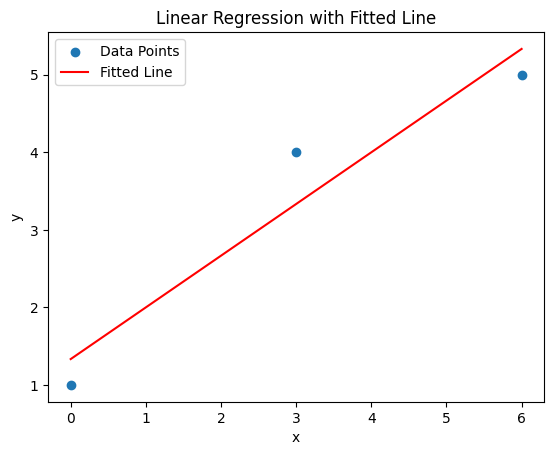

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function for linear regression
def linear_regression(x, y):
    # Add a column of ones to the predictor matrix X
    X = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))

    # Compute the transpose of X
    X_T = np.transpose(X)

    # Compute X^T * X
    X_T_X = np.dot(X_T, X)

    # Compute the inverse of X^T * X
    X_T_X_inv = np.linalg.inv(X_T_X)

    # Compute X^T * y
    X_T_y = np.dot(X_T, y)

    # Compute the coefficients beta
    beta = np.dot(X_T_X_inv, X_T_y)

    # Compute the fitted values
    y_fit = np.dot(X, beta)

    return beta, y_fit

# Example data
x_data = np.array([0, 3, 6])
y_data = np.array([1, 4, 5])

# Perform linear regression
coefficients, y_fit = linear_regression(x_data, y_data)

# Calculate R-squared value
correlation_matrix = np.corrcoef(y_data, y_fit)
r_squared = correlation_matrix[0, 1] ** 2

# Print coefficients and R-squared value
print("Coefficients:", coefficients)
print("R-squared:", r_squared)

# Plot the scatterplot and the fitted line
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, y_fit, label='Fitted Line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Fitted Line')
plt.show()


Coefficients: [ 1.          1.33333333 -0.11111111]
R-squared: 0.9999999999999996


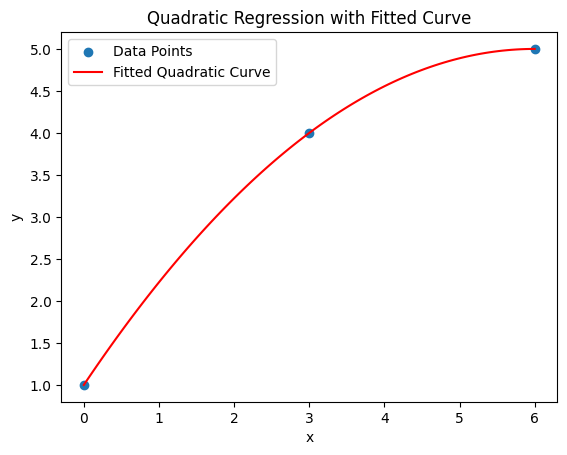

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function for quadratic regression
def quadratic_regression(x, y):
    # Add a column of ones, x, and x^2 to the predictor matrix X
    X = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1), (x**2).reshape(-1, 1)))

    # Compute the transpose of X
    X_T = np.transpose(X)

    # Compute X^T * X
    X_T_X = np.dot(X_T, X)

    # Compute the inverse of X^T * X
    X_T_X_inv = np.linalg.inv(X_T_X)

    # Compute X^T * y
    X_T_y = np.dot(X_T, y)

    # Compute the coefficients beta
    beta = np.dot(X_T_X_inv, X_T_y)

    # Compute the fitted values
    y_fit = np.dot(X, beta)

    return beta, y_fit

# Example data
x_data = np.array([0, 3, 6])
y_data = np.array([1, 4, 5])

# Perform quadratic regression
coefficients, y_fit = quadratic_regression(x_data, y_data)

# Calculate R-squared value
correlation_matrix = np.corrcoef(y_data, y_fit)
r_squared = correlation_matrix[0, 1] ** 2

# Print coefficients and R-squared value
print("Coefficients:", coefficients)
print("R-squared:", r_squared)

# Plot the scatterplot and the fitted quadratic curve
x_range = np.linspace(min(x_data), max(x_data), 100)
y_range_fit = coefficients[0] + coefficients[1] * x_range + coefficients[2] * (x_range ** 2)

plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_range, y_range_fit, label='Fitted Quadratic Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic Regression with Fitted Curve')
plt.show()


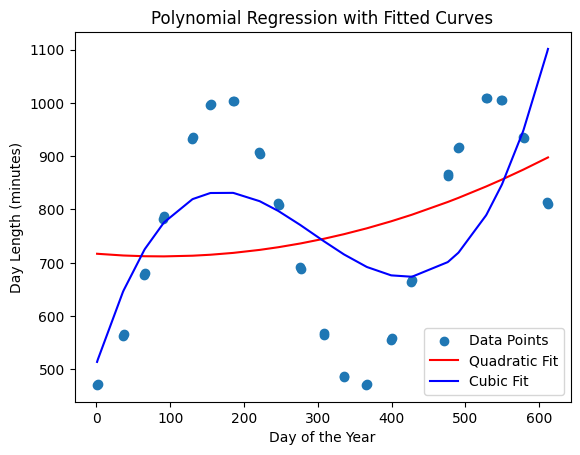

Quadratic Coefficients: [ 7.17103173e+02 -1.16541076e-01  6.72410506e-04]
Quadratic R-squared: 0.09782598257387273

Cubic Coefficients: [ 5.09798527e+02  4.38718521e+00 -1.81090090e-02  2.04561080e-05]
Cubic R-squared: 0.37212865907853765


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset using pandas
# Assuming the dataset is stored in a CSV file named 'day_length_data.csv'
df = pd.read_csv('sunrise_sunset_dataset.csv')

# Extract relevant columns and convert to numpy arrays
day_count = np.array(df['day_count'])
day_length = np.array(df['Day_length_mins_sec'])

# Function for polynomial regression
def polynomial_regression(x, y, degree):
    # Create the predictor matrix X with columns for each power of x up to the specified degree
    X = np.column_stack([x**i for i in range(degree + 1)])

    # Compute the transpose of X
    X_T = np.transpose(X)

    # Compute X^T * X
    X_T_X = np.dot(X_T, X)

    # Compute the inverse of X^T * X
    X_T_X_inv = np.linalg.inv(X_T_X)

    # Compute X^T * y
    X_T_y = np.dot(X_T, y[:len(x)])  # Trim y to match the length of x

    # Compute the coefficients beta
    beta = np.dot(X_T_X_inv, X_T_y)

    # Compute the fitted values
    y_fit = np.dot(X, beta)

    return beta, y_fit

# Perform quadratic regression (degree 2)
coefficients_quad, y_fit_quad = polynomial_regression(day_count, day_length, degree=2)

# Perform cubic regression (degree 3)
coefficients_cubic, y_fit_cubic = polynomial_regression(day_count, day_length, degree=3)

# Plot the scatterplot and the fitted polynomial curves
plt.scatter(day_count, day_length, label='Data Points')
plt.plot(day_count, y_fit_quad, label='Quadratic Fit', color='red')
plt.plot(day_count, y_fit_cubic, label='Cubic Fit', color='blue')
plt.xlabel('Day of the Year')
plt.ylabel('Day Length (minutes)')
plt.legend()
plt.title('Polynomial Regression with Fitted Curves')
plt.show()

# Calculate R-squared values
correlation_matrix_quad = np.corrcoef(day_length[:len(day_count)], y_fit_quad)
r_squared_quad = correlation_matrix_quad[0, 1] ** 2

correlation_matrix_cubic = np.corrcoef(day_length[:len(day_count)], y_fit_cubic)
r_squared_cubic = correlation_matrix_cubic[0, 1] ** 2

# Print coefficients and R-squared values
print("Quadratic Coefficients:", coefficients_quad)
print("Quadratic R-squared:", r_squared_quad)

print("\nCubic Coefficients:", coefficients_cubic)
print("Cubic R-squared:", r_squared_cubic)


